In [29]:
import numpy as np
import sys
from ucimlrepo import fetch_ucirepo 
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
##class for each layer
class Layer_Dense:
    def __init__(self, n_inputs, nuerons):
        self.weights = .1 * np.random.rand(n_inputs, nuerons)
        self.biases = np.zeros((1,nuerons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

#class for entire network
class Nueral:
     def __init__(self, layer1, layer2,activation1, activation2, loss):
         self.layer1 = layer1
         self.layer2 = layer2
         self.act1 = activation1
         self.act2 = activation2
         self.loss = loss
     ##implement backwards prop. with gradient descent
     def gradient_descent(self, loss, gradients, alpha, w1, w2, b1, b2,X_train,y_train,X_test, y_test_one_hot):
         loss_train = []
         loss_test = []
         epochs = int(1000)
         n = int(epochs/100)

         for i in range(epochs):
             self.layer1.weights -= alpha * self.gradients[0]
             self.layer1.biases -= alpha * self.gradients[1]
             self.layer2.weights -= alpha * self.gradients[2]
             self.layer2.biases -= alpha * self.gradients[3]

             self.layer1.forward(X_train)
             self.act1.forward(self.layer1.output)
             self.layer2.forward(self.act1.output)
             self.act2.forward(self.layer2.output)
             loss.forward(self.act2.output, y_train)
             loss1 = loss.output
             self.gradient(self.act2.output, y_train, self.act1.output, self.act2, X_train, self.layer1, self.layer2)

             self.layer1.forward(X_test)
             self.act1.forward(self.layer1.output)
             self.layer2.forward(self.act1.output)
             self.act2.forward(self.layer2.output)
             loss.forward(self.act2.output, y_test_one_hot)
             loss2 = loss.output


             
             if(i % 100 == 0):
                print(f"Epoch {i}: {loss1}\n")
                loss_train.append(loss1)
                loss_test.append(loss2)
         ##plot loss for training and test data
         x = np.linspace(0,n, n)
         plt.plot(x, loss_train, label = "Training Data Loss")
         plt.plot(x, loss_test, label = "Test Data Loss")
         plt.xlabel('Epoch')
         plt.ylabel('Loss')
         plt.legend()
     ##partial derivatives for each weight and bias
     def gradient(self, y_pred, y_true, activation1, activation2, X_train,layer1,layer2):
        m = len(y_pred)
        dLoss_dz = y_pred - y_true
        dLoss_drelu = np.dot(dLoss_dz, layer2.weights.T) * (activation1 > 0)
        dLoss_dw2 = np.dot(activation1.T / m, dLoss_dz)
        dLoss_dw1 = np.dot(X_train.T, dLoss_drelu)
        dLoss_db1 = np.sum(dLoss_dz) / m
        dLoss_db2 = np.sum((activation1 > 0))/m
        self.gradients = [dLoss_dw1, dLoss_db1, dLoss_dw2, dLoss_db2]
        


                
            

        
    


        
##activation classes(did not use sigmoid)
class Activation_RELU:
    def forward(self, input):
        self.output = np.maximum(0, input)
class Activation_sigmoid:
    def forward(self, input):
        self.output = 1/(1+np.exp(-input))
class Activation_softmax:
    def forward(self,input):
        exp_values = np.exp(input - np.max(input, axis = 1, keepdims=True))
        sum = np.sum(exp_values, axis = 1, keepdims = True)
        self.output = exp_values/sum

##calculate cross entropy loss
class CrossEntropyLoss:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred, 1e-7,1-1e-7)
        correct_values = np.sum(y_pred_clip*y_true, axis = 1)
        log = -np.log(correct_values)
        loss = np.mean(log)
        self.output = loss

class Optimizer:
    def gradient(self, y_pred, y_true, activation1, activation2, X_train,layer1,layer2):
        m = len(y_pred)
        dLoss_dz = y_pred - y_true
        dLoss_drelu = np.dot(dLoss_dz, layer2.weights.T) * (activation1 > 0)
        dLoss_dw2 = np.dot(activation1.T / m, dLoss_dz) + .01 * np.sign(layer2.weights)
        dLoss_dw1 = np.dot(X_train.T, dLoss_drelu) + .01*np.sign(layer1.weights)
        dLoss_db1 = np.sum(dLoss_dz) / m
        dLoss_db2 = np.sum((activation1 > 0))/m
        self.gradients = [dLoss_dw1, dLoss_db1, dLoss_dw2, dLoss_db2]
        
    








        

In [31]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# metadata 
#print(heart_disease.metadata) 
  
# variable information 
#print(heart_disease.variables) 


##normalize data, disregard last two columns
X = zscore(X)
X = X.iloc[:, :-2]

##split data into training and testing data
X_train = X.iloc[0:279,:]
X_test = X.iloc[280:302,:]
y_train = y.iloc[0:279]
y_test = y.iloc[280:302]

##convert y data into one-hot encoded data; convert data into two classes.
##0 indicates no heart disease, 1-4 indicates heast disease. Use 0 or 1 in encoded data for y/n for heart disease classification
num_classes = np.max(y_train) + 1
y_train_one_hot = np.eye(num_classes)[y_train].squeeze(axis=1)
y_test_one_hot = np.eye(num_classes)[y_test].squeeze(axis=1)

y_new_train = np.zeros((y_train_one_hot.shape[0],2),dtype=int)
y_new_train[:,0] = (y_train_one_hot[:,0] == 1).astype(int)
y_new_train[:,1] = 1 - y_new_train[:,0]

y_train_one_hot  = y_new_train

y_new_test = np.zeros((y_test_one_hot.shape[0],2),dtype=int)
y_new_test[:,0] = (y_test_one_hot[:,0] == 1).astype(int)
y_new_test[:,1] = 1 - y_new_test[:,0]

y_test_one_hot = y_new_test





Cross Entropy Loss:
Epoch 0: 0.6891387646596755

Epoch 100: 0.6350805334312071

Epoch 200: 0.5606131179142716

Epoch 300: 0.49061061180526644

Epoch 400: 0.44858600080148675

Epoch 500: 0.42729326994615957

Epoch 600: 0.4154941402220532

Epoch 700: 0.40842155910408307

Epoch 800: 0.40316712992735243

Epoch 900: 0.39931780471571965



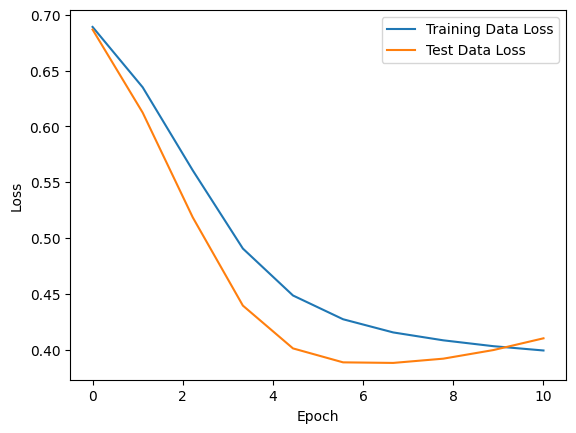

In [32]:
##initialize layers and forward propogate

layer1 = Layer_Dense(11,11)
activation1 = Activation_RELU()


layer1.forward(X_train)
activation1.forward(layer1.output)

layer2 = Layer_Dense(11,2)
activation2 = Activation_softmax()

layer2.forward(activation1.output)
activation2.forward(layer2.output)

##calculate loss
loss = CrossEntropyLoss()
loss.forward(activation2.output, y_train_one_hot)






alpha = .001 ##learning rate

##initialize and train network
network = Nueral(layer1, layer2, activation1, activation2, loss)
network.gradient(activation2.output, y_train_one_hot, activation1.output, activation2.output, X_train,layer1,layer2)
print("Cross Entropy Loss:")
network.gradient_descent(loss, network.gradients, alpha, layer1.weights, layer2.weights, layer1.biases, layer2.biases,X_train,y_train_one_hot, X_test, y_test_one_hot)

##forward propogate test data
layer1.forward(X_test)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
np.set_printoptions(suppress=True)







In [33]:
loss.forward(activation2.output, y_test_one_hot)
print(f"Test Data Loss: {loss.output}")


Test Data Loss: 0.4216538046716394


In [34]:
##Predictions for test data
print("Test Data Predictions: probability distribution to predict class(heart diease or no heart disease)")
print("First column indicates heart disease, second column indicates no heart disease\n")

print(activation2.output)

print("Actual Given Test Data: 1 in first column indicates heart disease, 1 in second columns indicates no heart disease")
print(y_test_one_hot)

Test Data Predictions: probability distribution to predict class(heart diease or no heart disease)
First column indicates heart disease, second column indicates no heart disease

[[0.05455102 0.94544898]
 [0.86872832 0.13127168]
 [0.1689378  0.8310622 ]
 [0.95708848 0.04291152]
 [0.59291837 0.40708163]
 [0.05729133 0.94270867]
 [0.05243829 0.94756171]
 [0.56282946 0.43717054]
 [0.73995585 0.26004415]
 [0.5301086  0.4698914 ]
 [0.47897639 0.52102361]
 [0.97341072 0.02658928]
 [0.09752866 0.90247134]
 [0.03237185 0.96762815]
 [0.55648432 0.44351568]
 [0.95838745 0.04161255]
 [0.05711784 0.94288216]
 [0.31413251 0.68586749]
 [0.69266101 0.30733899]
 [0.0744585  0.9255415 ]
 [0.11025755 0.88974245]
 [0.9420738  0.0579262 ]]
Actual Given Test Data: 1 in first column indicates heart disease, 1 in second columns indicates no heart disease
[[0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
